 # HW 6-1 DIY Gradient Descent

 Wei-Pin, Hsiao @ NTNU Math

 ---

 Before create gradient descent in more general way, we need numerical derivative function.

 ## Numerical Derivative Function

 > via https://www.math.ubc.ca/~pwalls/math-python/differentiation/

 Since The derivative of a function $f(x)$ at $x=a$ is

 $$
 f'(a) = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}
 $$

 The numerical approach of derivative can use [finite difference](https://en.wikipedia.org/wiki/Finite_difference#Forward,_backward,_and_central_differences):

 - forward difference

   $$
   f'(a) \approx \frac{f(a + h) - f(a)}{h},
   $$

 - backward difference

   $$
   f'(a) \approx \frac{f(a) - f(a - h)}{h},
   $$

 - central difference

   $$
   f'(a) \approx \frac{1}{2} \left( \frac{f(a + h) - f(a)}{h} + \frac{f(a) - f(a - h)}{h} \right) = \frac{f(a + h) - f(a - h)}{2h}.
   $$

 Use this formula, we can use belowing function to get numerical solution of derivative.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def derivative(f, a, method='central', h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")


 ## Single Variable Gradient Descent Function
 
 The formula of gradient descent is

 $$
 x -\eta \frac{L(x)}{x}.
 $$


In [2]:
def SGD(f, x_int=np.random.rand(1), eta=1, err=10**(-7), maxIter=1000):
    '''Single variable gradient descent for loss function f(x).

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    x_int : number
        Initial value of x
    eta : number
        Learning rate
    err : number
        Acceptable compute error, for use in stop condition
    maxIter: number
        Maximun iteration steps of gradient descent

    Returns
    -------
    list    
    '''
    x = x_int
    diff = 1
    while diff >= err:
        x = np.append(x, x[-1] - eta * derivative(
            f, x[-1], method='central', h=np.sqrt(err)))
        diff = abs(x[-1]-x[-2])
    return x[-1], x

 ## Example

 We use $f(x) = - \left(\frac{4x^2+2x+1}{x+2e^x}\right)^x$ as loss function


In [3]:
def f(x): return -((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x

 The estimate of minmun loss occur at:

In [4]:
x_est, lc_x = SGD(f)
print("The minmun of f(x) occur at: x=", x_est,
      " . (Using", len(lc_x), "steps.)")

The minmun of f(x) occur at: x= 2.0653555407083775  . (Using 21 steps.)


 most of steps is very close to the minmun point

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


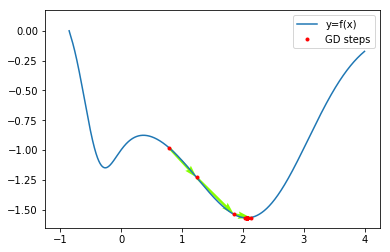

In [5]:
lc_y = f(lc_x)

x = np.linspace(-1, 4, 10000)
y = f(x)
plt.figure()
plt.plot(x, y, label='y=f(x)')
plt.plot(lc_x, lc_y, 'r.', label='GD steps')
plt.quiver(lc_x[:-1], lc_y[:-1], lc_x[1:]-lc_x[:-1], lc_y[1:] -
           lc_y[:-1], scale_units='xy', angles='xy', scale=1, color='#88FF00')
plt.legend(loc='best')